**Ссылка на github**: https://github.com/Skoolz/yproject

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Изменение-порога-классификации" data-toc-modified-id="Изменение-порога-классификации-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение порога классификации</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [62]:
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, recall_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
import seaborn as sns


In [63]:
%pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [64]:
from pandas_profiling  import ProfileReport

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте
</div>

In [65]:
data = pd.read_csv('/datasets/Churn.csv',index_col='RowNumber')

In [66]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


### Описание данных

Всего в датасете 10 000 объектов.<br/>

Признаки<br/>
RowNumber — индекс строки в данных<br/>
CustomerId — уникальный идентификатор клиента<br/>
Surname — фамилия<br/>
CreditScore — кредитный рейтинг<br/>
Geography — страна проживания<br/>
Gender — пол<br/>
Age — возраст<br/>
Tenure — сколько лет человек является клиентом банка<br/>
Balance — баланс на счёте<br/>
NumOfProducts — количество продуктов банка, используемых клиентом<br/>
HasCrCard — наличие кредитной карты<br/>
IsActiveMember — активность клиента<br/>
EstimatedSalary — предполагаемая зарплата<br/>

Целевой признак<br/>
Exited — факт ухода клиента<br/>

Присутствуют пропуски в столбце Tenure - 909 (9%)

Так как пропусков больше 1%, попробуем сохранить эти данные. Для этого найдем способ заполнить пропуски

In [68]:
sum(data['Tenure']==0)

382

In [69]:
sum(data['Tenure'].isnull())

909

In [70]:
sum(data['Tenure'].isnull())/len(data)

0.0909

<AxesSubplot:>

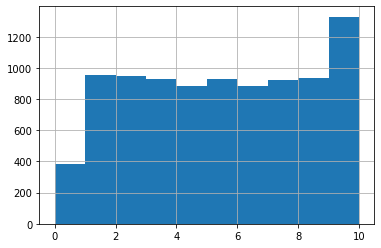

In [71]:
data['Tenure'].hist()

In [72]:
data['Tenure'].median()

5.0

In [73]:
data.query('Tenure.isnull()').describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [74]:
data.query('not Tenure.isnull()').describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.091000e+03,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,1.569105e+07,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938
std,7.161419e+04,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562899e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000
50%,1.569106e+07,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000
75%,1.575285e+07,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000
max,1.581566e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


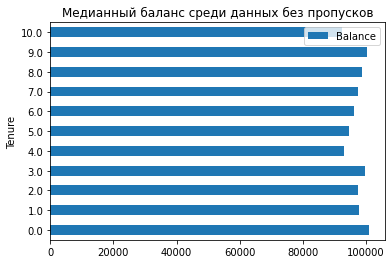

In [75]:
data.query('not Tenure.isnull()').pivot_table(index='Tenure',values='Balance',aggfunc='median').plot(kind='barh',title='Медианный баланс среди данных без пропусков');

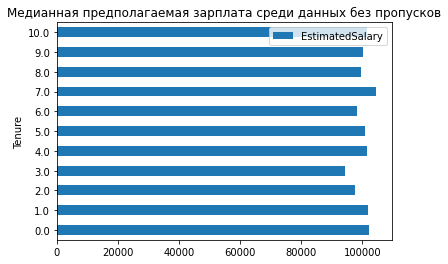

In [76]:
data.query('not Tenure.isnull()').pivot_table(index='Tenure',values='EstimatedSalary',aggfunc='median').plot(kind='barh',title='Медианная предполагаемая зарплата среди данных без пропусков');

In [77]:
probs = data['Tenure'].value_counts()/len(data.query('not Tenure.isnull()'))

In [78]:
list(probs)

[0.1047189528104719,
 0.1044989550104499,
 0.1026289737102629,
 0.10207897921020789,
 0.1019689803101969,
 0.1017489825101749,
 0.0973490265097349,
 0.09701902980970191,
 0.0969090309096909,
 0.04905950940490595,
 0.042019579804201956]

In [79]:
random.seed(123)

In [80]:
data['Tenure'] = data['Tenure'].apply(lambda x: random.choices(list(probs.index),list(probs))[0] if pd.isnull(x) else x)

In [81]:
sum(data['Tenure'].isnull())

0

### Заполнение пропусков

В результате анализа данных, не было выялвено явного различия между данными с пропусками и без. Медианы, стандартные отклонения, квартили признаков среди данных с пропусками и без практически не отличаются. Также не было выявлено закономерности, при которой при увеличении значения признака Tenure остальные признаки строго увеличиваются/уменьшаются. Поэтому было решено случайно заполнить данные с сохранением соотношения каждого значения признака Tenure в данных.

### Подготовка данных

In [82]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<AxesSubplot:>

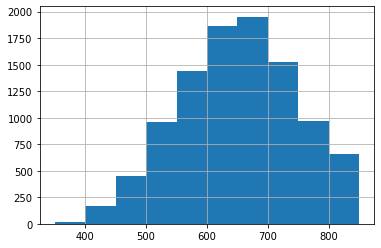

In [83]:
data['CreditScore'].hist()

In [84]:
data['NumOfProducts'] = data['NumOfProducts'].astype(object)

In [85]:
numeric = ['CreditScore','Age','Balance','EstimatedSalary']
quality = ['Geography','Gender','NumOfProducts','Tenure']

In [86]:
data_scaled = data

In [87]:
data_scaled = pd.get_dummies(data_scaled,columns=quality,drop_first=True)

In [88]:
data_scaled

,CustomerId,Surname,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,0.00,1,1,101348.88,1,0,...,0,1,0,0,0,0,0,0,0,0
2,15647311,Hill,608,41,83807.86,0,1,112542.58,0,0,...,1,0,0,0,0,0,0,0,0,0
3,15619304,Onio,502,42,159660.80,1,0,113931.57,1,0,...,0,0,0,0,0,0,0,1,0,0
4,15701354,Boni,699,39,0.00,0,0,93826.63,0,0,...,1,0,0,0,0,0,0,0,0,0
5,15737888,Mitchell,850,43,125510.82,1,1,79084.10,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,39,0.00,1,0,96270.64,0,0,...,0,0,0,0,1,0,0,0,0,0
9997,15569892,Johnstone,516,35,57369.61,1,1,101699.77,0,0,...,0,0,0,0,0,0,0,0,0,1
9998,15584532,Liu,709,36,0.00,0,1,42085.58,1,0,...,0,0,0,0,0,0,1,0,0,0


In [89]:
data_scaled.describe()

,CustomerId,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,...,Tenure_1.0,Tenure_2.0,Tenure_3.0,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.0000,10000.0000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,76485.889288,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,...,0.106400,0.105000,0.103700,0.098100,0.099300,0.09500,0.1018,0.1018,0.097700,0.049400
std,7.193619e+04,96.653299,10.487806,62397.405202,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,...,0.308364,0.306569,0.304886,0.297465,0.299079,0.29323,0.3024,0.3024,0.296923,0.216713
min,1.556570e+07,350.000000,18.000000,0.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,0.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0000,0.000000,0.000000
max,1.581569e+07,850.000000,92.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0000,1.0000,1.000000,1.000000


In [90]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Вывод

Количественные признаки: кредитный рейтинг; возраст; баланс на счёте; предполагаемая зарплата.<br/>
Были преобразованы с помощью стандартизации.<br/>
Категориальные признаки: страна проживания; пол; количество продуктов банка, используемых клиентом; сколько лет человек является клиентом банка.<br/>
Были преобразованы с помощью техники прямого кодирования.<br/>
Итоговое количество столбцов:24<br/>

## Исследование задачи

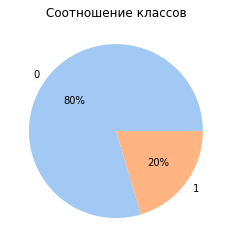

In [91]:
colors = sns.color_palette('pastel')[0:2]
plt.pie((data_scaled['Exited'].value_counts()/len(data_scaled['Exited'])),labels=['0','1'],autopct='%.0f%%',colors=colors);
plt.title('Соотношение классов')
plt.show()

In [92]:
data_scaled['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64


<div class="alert alert-block alert-success">
<b>Успех:</b> дисбаланс обнаружен
</div>

In [93]:
features = data_scaled.drop(['Exited','CustomerId','Surname'],axis=1)
target = data_scaled['Exited']


<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить неинформативные признаки - хорошее решение.
</div>


In [94]:
features.columns

Index(['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4',
       'Tenure_1.0', 'Tenure_2.0', 'Tenure_3.0', 'Tenure_4.0', 'Tenure_5.0',
       'Tenure_6.0', 'Tenure_7.0', 'Tenure_8.0', 'Tenure_9.0', 'Tenure_10.0'],
      dtype='object')

In [95]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2,random_state=12345)

In [96]:
features_train,features_valid,target_train,target_valid = train_test_split(features_train,target_train,test_size=0.25,random_state=12345)

In [97]:
scaler = StandardScaler()

In [98]:
scaler.fit(features_train[numeric])

StandardScaler()

In [99]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test.loc[:,numeric] = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [100]:
predicitons = [target_train.median()]*len(target_valid)
print("F1 медианного значения:",f1_score(target_valid,predicitons))

F1 медианного значения: 0.0


In [102]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_train,target_train)
predicitons = model.predict(features_valid)
probs = model.predict_proba(features_valid)[:,1]
print(f'Показатели логистической регрессии: F1:{f1_score(target_valid,predicitons):.2}; AUC-ROC:{roc_auc_score(target_valid,probs):.2}')

Показатели логистической регрессии: F1:0.51; AUC-ROC:0.83


In [105]:
best_score = 0
best_auc_score = 0
best_n = 0
for depth in range(1,20,1):
    for n in range(1,100,5):
        model = RandomForestClassifier(random_state=12345,max_depth=depth,n_estimators=n)
        model.fit(features_train,target_train)
        predictions = model.predict(features_valid)
        score = f1_score(target_valid,predictions)
        if(score>best_score):
            probs = model.predict_proba(features_valid)[:,1]
            best_n = n
            best_score=score
            best_auc_score = roc_auc_score(target_valid,probs)

In [106]:
print(f'Показатели Случайного леса: F1:{best_score}; AUC-ROC:{best_auc_score}. max_depth:9, n_estimators:{n}')

Показатели Случайного леса: F1:0.5491525423728814; AUC-ROC:0.8488664306752777. max_depth:9, n_estimators:96


### Вывод

Соотношение классов:<br/>
0 (клиент не ушел) - 7963 (80%)<br/>
1 (клиент ушел) - 2037 (20%)<br/>

Лучшие результаты у модели-Случайный лес с гиперпараметрами: max_depth=9 n_estimators:96(random_state=12345)<br/>
Результаты на валидационной выборке: F1:0.549; AUC-ROC:0.85<br/>

Явное сильное смещение соотношения классов. Для достижения лучшего результата качества модели необходимо либо убрать дисбаланс, либо учесть его при вычислениях.<br/>

## Борьба с дисбалансом

In [107]:
target_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

### Уменьшение выборки

In [108]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [109]:
features_downsampled, target_downsampled = downsample(features_train,target_train,0.26)

In [110]:
target_downsampled.value_counts()

0    1243
1    1219
Name: Exited, dtype: int64

In [113]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_downsampled,target_downsampled)
probs = model.predict_proba(features_valid)[:,1]
predicitons = model.predict(features_valid)
print(f'F1:{f1_score(target_valid,predicitons)}; AUC ROC:{roc_auc_score(target_valid,probs)}')

F1:0.5612648221343873; AUC ROC:0.848852124955692


### Увеличение выборки

In [114]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [115]:
features_upsampled, target_upsampled = upsample(features_train,target_train,4)

In [116]:
target_upsampled.value_counts()

1    4876
0    4781
Name: Exited, dtype: int64

In [117]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_upsampled,target_upsampled)
predictions = model.predict(features_valid)
probs = model.predict_proba(features_valid)[:,1]
print(f'F1:{f1_score(target_valid,predictions)}; AUC ROC:{roc_auc_score(target_valid,probs)}')

F1:0.580715059588299; AUC ROC:0.8536842791268425


### Изменение порога классификации

In [118]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_train,target_train)
for threshold in np.arange(0.01, 0.6, 0.02):
    predicitons = model.predict_proba(features_valid)[:,1]>threshold

    print(f"Порог = {threshold:.2f} | F1 = {f1_score(target_valid,predicitons)}")

Порог = 0.01 | F1 = 0.32705980761187786
Порог = 0.03 | F1 = 0.3381014304291287
Порог = 0.05 | F1 = 0.3708672735984667
Порог = 0.07 | F1 = 0.39958158995815896
Порог = 0.09 | F1 = 0.4319356691556577
Порог = 0.11 | F1 = 0.45454545454545453
Порог = 0.13 | F1 = 0.4819444444444444
Порог = 0.15 | F1 = 0.5104732350659426
Порог = 0.17 | F1 = 0.5240101095197979
Порог = 0.19 | F1 = 0.5406871609403254
Порог = 0.21 | F1 = 0.5606207565470417
Порог = 0.23 | F1 = 0.5749741468459152
Порог = 0.25 | F1 = 0.5861690450054885
Порог = 0.27 | F1 = 0.5864485981308412
Порог = 0.29 | F1 = 0.5955334987593052
Порог = 0.31 | F1 = 0.6
Порог = 0.33 | F1 = 0.6021505376344086
Порог = 0.35 | F1 = 0.6047156726768378
Порог = 0.37 | F1 = 0.5977011494252874
Порог = 0.39 | F1 = 0.5901639344262295
Порог = 0.41 | F1 = 0.5884146341463414
Порог = 0.43 | F1 = 0.5830721003134797
Порог = 0.45 | F1 = 0.5759493670886076
Порог = 0.47 | F1 = 0.5588235294117647
Порог = 0.49 | F1 = 0.5497470489038786
Порог = 0.51 | F1 = 0.529209621993127

In [120]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_train,target_train)
predictions = model.predict_proba(features_valid)[:,1]>0.35
probs = model.predict_proba(features_valid)[:,1]
precision = precision_score(target_valid,predictions)
recall = recall_score(target_valid,predictions)
f1 = f1_score(target_valid,predictions)

print(f'Результаты лучшей модели: точность = {precision:.2}; полнота = {recall:.2}; f1 = {f1:.2}; auc-roc = {roc_auc_score(target_valid,probs):.2}')

Результаты лучшей модели: точность = 0.66; полнота = 0.56; f1 = 0.6; auc-roc = 0.85


### Вывод

Были рассмотрены 3 метода борьбы с дисбалансом:<br/>
1) Уменьшение выборки<br/>
2) Увеличение выборки<br/>
3) Изменение порога классификации<br/>

Модель-лучшая модель по предыдущим тестам:<br/>
Случайное дерево с гиперпараметрами: max_depth=9, n_estimators=96 (random_state=12345)<br/>

Результаты (F1-оценка):<br/>
1) Уменьшение выборки:0.56<br/>
2) Увеличение выборки:0.58<br/>
3) Изменение порога классификации:0.6<br/>

AUC-ROC:0.85<br/>

Исходя из результатов выберем лучший метод: изменение порога классификации.<br/>
В итоге F1-оценка выросла с 0.56 до 0.6. Изменение:0.04.<br/>
Следовательно, модель стала точнее отвечать.<br/>

## Тестирование модели

In [57]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_train,target_train)
predicitons = model.predict_proba(features_test)[:,1]>0.35
precision = precision_score(target_test,predicitons)
recall = recall_score(target_test,predicitons)
f1 = f1_score(target_test,predicitons)

print(f'Результаты лучшей модели: точность = {precision:.2}; полнота = {recall:.2}; f1 = {f1:.2}')

Результаты лучшей модели: точность = 0.7; полнота = 0.59; f1 = 0.64


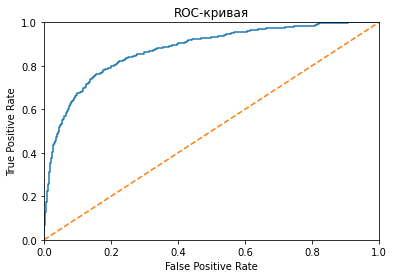

In [58]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_train,target_train)
probs = model.predict_proba(features_test)[:,1]
fpr, tpr, thresholds = roc_curve(target_test, probs) 
plt.figure()


plt.plot(fpr,tpr)


plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [121]:
model = RandomForestClassifier(random_state=12345,max_depth=9,n_estimators=96)
model.fit(features_train,target_train)
predicitons = model.predict(features_test)
probs = model.predict_proba(features_test)[:,1]

print(f'Результаты лучшей модели: AUC-ROC = {roc_auc_score(target_test,probs):.2}')

Результаты лучшей модели: AUC-ROC = 0.87


In [60]:
importances = pd.Series(model.feature_importances_,index=features_train.columns)

<AxesSubplot:title={'center':'Важность признаков'}>

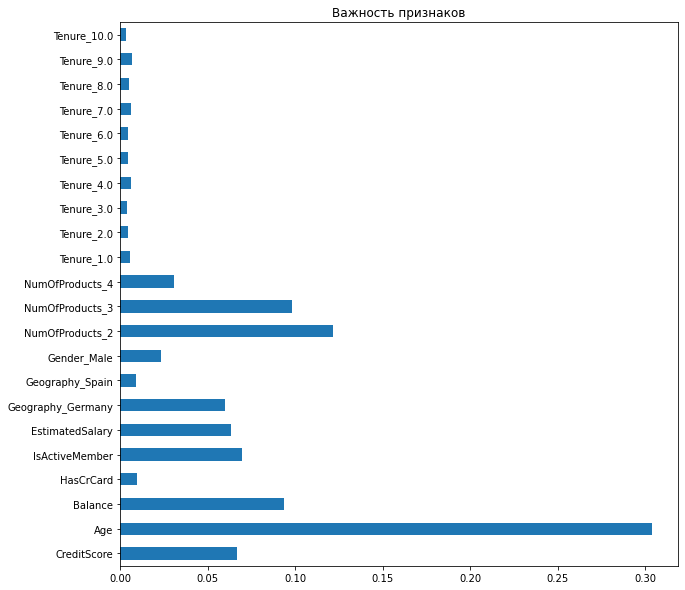

In [61]:
importances.plot(kind='barh',figsize=(10,10),title='Важность признаков')

### Вывод

Лучшая модель-Случайное дерево с гиперпараметрами: max_depth=9, n_estimators=96 (random_state=12345)<br/>
Метод борьбы с дисбалансом - изменение порога классификации - 0.35<br/>

Результаты модели на валидационной выборке: точность = 0.66; полнота = 0.55; f1 = 0.6<br/>
Результаты модели на тестовой выборке: точность = 0.7; полнота = 0.59; f1 = 0.64<br/>

AUC-ROC = 0.87 - на 0.37 больше случайном модели (0.5). Является показателем очень хорошего качества модели<br/>

Признаки по влиянию на результат в порядке убывания:<br/>
возраст<br/>
количество продуктов<br/>
баланс<br/>
и др.<br/>

Меньше всего на уход клиента из банка влияют: сколько лет человек является клиентом банка,страна проживания, наличие кредитной карты


**Рекомендации**: Для улучшения качества модели увеличить выборку, включив больше объектов с целевым признаком "1" (клиент ушел), рассмотреть другие способы борьбы с дисбалансом, рассмотреть другие гиперпараметры моделей, рассмотреть другие модели.